In [1]:
%matplotlib widget

from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes = load_diabetes(scaled=False) # disable Feature Scaling
data_unscaled = diabetes.data # (m x n) (examples x features)

severity = diabetes.target.reshape((-1,1)) # output of severity of diabetes or disease progression
# mx1

print(data_unscaled.dtype, severity.dtype) # show datatypes of input and output
print(data_unscaled.shape) # show shape of input
print(diabetes.feature_names) # show feature names associated with input
print(data_unscaled) # show unscaled data itself

float64 float64
(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[59.      2.     32.1    ...  4.      4.8598 87.    ]
 [48.      1.     21.6    ...  3.      3.8918 69.    ]
 [72.      2.     30.5    ...  4.      4.6728 85.    ]
 ...
 [60.      2.     24.9    ...  3.77    4.1271 95.    ]
 [36.      1.     30.     ...  4.79    5.1299 85.    ]
 [36.      1.     19.6    ...  3.      4.5951 92.    ]]


In [3]:
def predict(w,b,x):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features
    
    prediction = np.matmul(x, w) + b
    return prediction

In [4]:
def mse_cost(w,b,x,y):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features
    
    prediction = np.matmul(x, w) + b
    error = prediction - y
    error = error.reshape((-1)) # make it m (1d array) from mx1
    
    return np.dot(error, error) / (2*m)

In [5]:
def compute_gradient(w,b,x,y):
    m = x.shape[0] # number of training examples
    n = x.shape[1] # number of features

    # w = nx1
    # b = 1
    # x = mxn
    # y = mx1
    
    prediction = np.matmul(x, w) + b # mx1
    error = prediction - y # mx1
    
    xT = np.transpose(x) # nxm
    dw = np.matmul(xT, error) / m # nx1
    db = np.sum(error) / m # 1

    return dw, db

Showcase z score normalization feature scaling. Feature scaling is actually very easy with numpy. By taking mean and standard deviation of all columns (axis 0) we can just do a matrix subtract and division to get the data in one single step. This is a direct translation of the z score formula and makes it very simple to implement using numpy. Sigma is standard deviation and u is mean in the formula below.

$z=(x-u)/\sigma$

In [6]:
def feature_scale(data_unscaled):
    mu = np.mean(data_unscaled, axis=0)
    std = np.std(data_unscaled, axis=0)

    data_scaled = np.array(data_unscaled)
    data_scaled = (data_scaled - mu) / std
    # z score normalization
    
    return data_scaled

data = feature_scale(data_unscaled)
print(data) # show scaled features

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41853093
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43658851
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06015558
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98564884
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93616291
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08875225
   0.06442552]]


In [7]:
m = data.shape[0] # number of training examples
n = data.shape[1] # number of features

w = np.zeros((n,1)) # n features
b = 0
# initialize model parameters

a=0.3
max_iterations=20
iteration = np.empty(0, dtype=np.uint)
costs = np.empty(0)

for i in range(max_iterations):
    dw, db = compute_gradient(w,b,data,severity)
    
    w-=a*dw
    b-=a*db
    # update the weights
    
    iteration = np.append(iteration, i)
    current_cost = mse_cost(w,b,data,severity)
    costs = np.append(costs, current_cost)
    # add to array for visualization

Also I tried running gradient descent without feature scaling and the weights basically exploded to huge values and after just a few iterations, gradient descent stopped working. 
These are called exploding gradients.
Eventually, I just re-enabled feature scaling and gradient descent works nicely again.

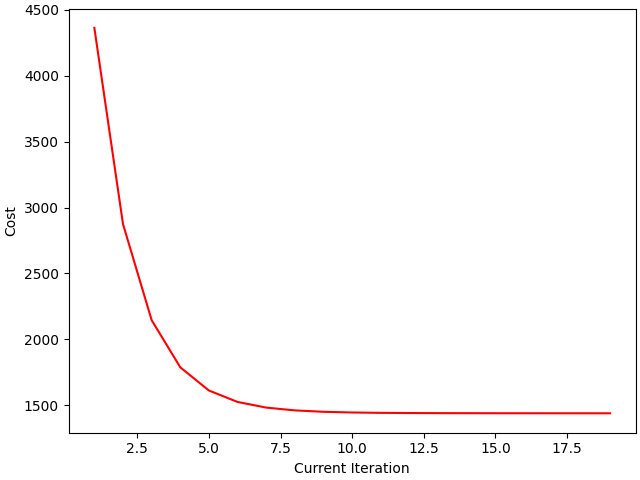

In [8]:
iteration = iteration[1:]
costs = costs[1:]

# graph the cost after updating the model
fig, cost_graph = plt.subplots(layout='constrained')

cost_graph.set_xlabel("Current Iteration")
cost_graph.set_ylabel("Cost")

cost_graph.plot(iteration, costs, color="r")

Cost Graph over Gradient Descent Iterations. 

In [9]:
print("w:", w.reshape((-1)))
print("b:", b)
print("1st Cost:", costs[0])
print("Nth Cost:", costs[-1])

w: [ -0.31058692 -11.28489499  25.1561175   15.32166059  -3.32594522
  -5.28368843  -9.74582834   5.51432538  22.30061411   3.55625362]
b: 152.01209340808492
1st Cost: 4362.218875929123
Nth Cost: 1440.128507475917


Only around 20 iterations are needed with feature scaling in this situation. It looks way too short. 